In [ ]:
import os
import glob
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from torch.utils.data import Dataset
from torchvision import datasets, transforms,models
np.set_printoptions(6)

In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import pandas as pd
from torchvision.datasets import ImageFolder


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

root = "drive/MyDrive/Assignment 3 Dataset"

In [ ]:

transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        transforms.CenterCrop((500, 500)),
        transforms.Resize(224),
        transforms.ToTensor(),
     ])


In [ ]:
class CreateDataset(Dataset):
    def __init__(self, data, path , transform = None):
      super().__init__()
      self.data = data.values
      self.path = path
      self.transform = transform

    def __len__(self):
      return len(self.data)

    def __getitem__(self,index):
      img_name,label = self.data[index]
      img_path = os.path.join(self.path, img_name)
      image = plt.imread(img_path)
      if self.transform is not None:
        image = self.transform(image)
      return image, label


In [ ]:
data_path_train = "drive/MyDrive/Assignment 3 Dataset/train.csv"
data_path_test = "drive/MyDrive/Assignment 3 Dataset/test.csv"

df_labels_train = pd.read_csv(data_path_train)
df_labels_val = pd.read_csv(data_path_test)

In [ ]:
def visualize(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])

In [ ]:
dataset = CreateDataset(df_labels_train, root, transform)

In [ ]:
split_ratio = 0.8
split_size = int(split_ratio * len(dataset))


In [ ]:
train_dataset,val_dataset = random_split(dataset,[split_size,len(dataset)-split_size])


In [ ]:
train_loader = DataLoader(train_dataset, batch_size =100, shuffle = True)

In [ ]:
val_loader = DataLoader(val_dataset,batch_size=100,shuffle=False)

In [ ]:
phases = {
    'train': train_dataset,
    'valid': val_dataset,
    'test': dataset
    }
loader = {
    phase: DataLoader(ds, batch_size=100, shuffle=(phase=='train'))
    for phase, ds in phases.items()
}

In [ ]:
train_dataset[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
def visualize(image, label):
  plt.figure()
  plt.imshow(image)
  plt.title(str(label))
  plt.xticks([])
  plt.yticks([])


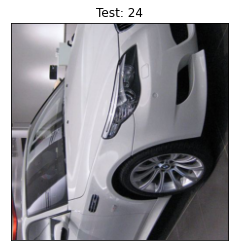

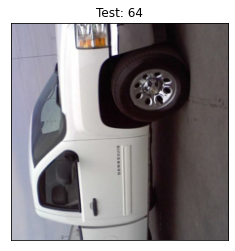

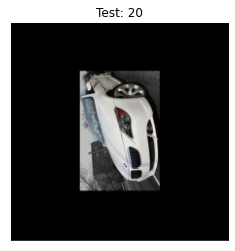

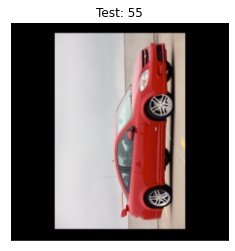

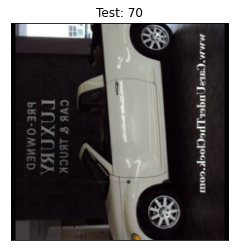

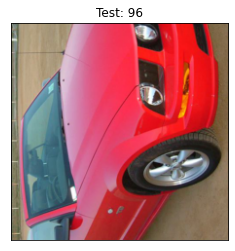

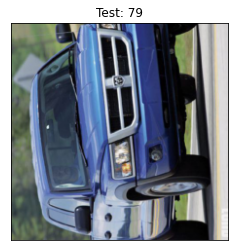

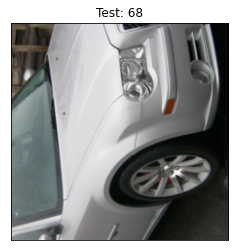

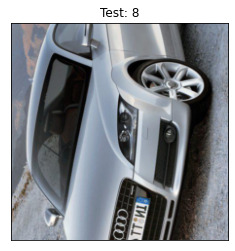

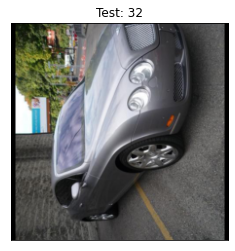

In [ ]:
train_examples = [train_dataset[i] for i in range(10)]
for image, label in train_examples:
  image = torch.permute(image, (2, 1, 0)).numpy()
  visualize(image, f'Test: {label}')


In [ ]:
def freeze(model):
  for param in model.parameters():
    param.requires_grad = False

# unfreeze the parameters of the first layer
def unfreeze(model):
  for param in model.layer1.parameters():
    param.requires_grad = True

In [ ]:
num_classes = 100  # Flower dataset has 100 classes
model = models.resnet18(pretrained=True)
num_features = model.fc.in_features
freeze_features = True
if freeze_features:
  freeze(model)

model.fc = nn.Linear(num_features, num_classes)

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [ ]:
def evaluate(model, loader, device, criterion, mode='validation'):
  model.eval()
  total_correct = 0
  total_loss = 0
  total = 0
  for i, (images, labels) in enumerate(loader[mode]):
    images = images.to(device)
    labels = labels.to(device)
    with torch.no_grad():
      outputs = model(images)
      loss = criterion(outputs, labels)
      total_loss += loss.item() * images.size(0)
      total += images.size(0)
      _, predictions = outputs.max(1)
      total_correct += (labels == predictions).sum()
  loss = total_loss / total
  accuracy = total_correct / total
  print(f'{mode} epoch {epoch}: Loss({loss:6.4f}) Accuracy ({accuracy:6.4f})')




In [ ]:
model = model.to(device)
epochs = 20
for epoch in range(epochs):
  model.train()
  total = 0
  total_correct = 0
  total_loss = 0
  for i, (images, labels) in enumerate(loader['train']):
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    total += images.size(0)
    _, predictions = outputs.max(1)
    total_correct += (predictions == labels).sum()
    total_loss += loss.item() * images.size(0)
  accuracy = total_correct / total
  loss = total_loss / total
  print(f'Train epoch {epoch}: Loss({loss:6.4f}) Accuracy ({accuracy:6.4f})')
  evaluate(model, loader, device, criterion, mode='valid')

Train epoch 0: Loss(4.7152) Accuracy (0.0112)
valid epoch 0: Loss(4.6533) Accuracy (0.0145)
Train epoch 1: Loss(4.6060) Accuracy (0.0184)
valid epoch 1: Loss(4.6015) Accuracy (0.0181)
Train epoch 2: Loss(4.5302) Accuracy (0.0239)
valid epoch 2: Loss(4.5600) Accuracy (0.0121)
Train epoch 3: Loss(4.4611) Accuracy (0.0354)
valid epoch 3: Loss(4.5074) Accuracy (0.0242)
Train epoch 4: Loss(4.3955) Accuracy (0.0426)
valid epoch 4: Loss(4.4592) Accuracy (0.0363)
Train epoch 5: Loss(4.3373) Accuracy (0.0580)
valid epoch 5: Loss(4.4158) Accuracy (0.0459)
Train epoch 6: Loss(4.2756) Accuracy (0.0695)
valid epoch 6: Loss(4.3748) Accuracy (0.0508)
Train epoch 7: Loss(4.2165) Accuracy (0.0825)
valid epoch 7: Loss(4.3377) Accuracy (0.0508)
Train epoch 8: Loss(4.1603) Accuracy (0.1070)
valid epoch 8: Loss(4.3023) Accuracy (0.0629)
Train epoch 9: Loss(4.1096) Accuracy (0.1209)
valid epoch 9: Loss(4.2801) Accuracy (0.0593)
Train epoch 10: Loss(4.0597) Accuracy (0.1315)
valid epoch 10: Loss(4.2446) Accu

In [ ]:
total_params = sum(
	param.numel() for param in model.parameters()
)
print('Total number of parameters:', total_params)

Total number of parameters: 11227812


In [ ]:

trainable_params = sum(
	p.numel() for p in model.parameters() if p.requires_grad
)
print('Total number of trainable parameters:', trainable_params)

Total number of trainable parameters: 51300


In [ ]:
evaluate(model, loader, device, criterion, mode='test')


test epoch 19: Loss(3.6738) Accuracy (0.2380)
